In [26]:
#Visualise drift lines

In [81]:

#INITIALIZION
#Kernel PyROOT
import os
#os.sys.path.append('/usr/common/software/rootpy')
#os.sys.path.insert(0,'/usr/common/software/uproot')
#import root_numpy
#import root_numpy as root_np
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('GTK3Agg')
import ROOT
import pandas as pd
from scipy.optimize import curve_fit

import sys
from matplotlib.colors import LogNorm
import pylab

import glob
import uproot

import scipy
from scipy.optimize import curve_fit

%pylab inline
#pylab.rcParams['figure.figsize'] = (10.0, 8.0)

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

print("Starting notebook....")




Populating the interactive namespace from numpy and matplotlib
Starting notebook....


/cvmfs/sft.cern.ch/lcg/views/LCG_95/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [93]:
#Function to turn file into arrays
def Get_drift_line_arrays(filename):
    file = open(filename, 'r')
    lines = file.readlines()

    #print len(lines)
    #print lines[2]

    rIN_cm = float(lines[10].split('\t\t')[0])
    zIN_cm = float(lines[10].split('\t\t')[1])

    DriftTime_us_list = []
    r_cm_list = []
    z_cm_list = []

    DriftTime_us_list.append(0.0)
    r_cm_list.append(rIN_cm)
    z_cm_list.append(zIN_cm)

    for i in range(0,len(lines)):
        if lines[i].startswith('#'):
            continue
        else:
            a = lines[i].split('\t\t')
            #print a
            DriftTime_us_list.append(float(a[2]))
            r_cm_list.append(float(a[3]))
            z_cm_list.append(float(a[4]))
    return np.asarray(r_cm_list), np.asarray(z_cm_list), np.asarray(DriftTime_us_list)

def Get_file_length(filename):
    file = open(filename, 'r')
    lines = file.readlines()
    return len(lines)


def Get_i_line_from_file(filename, i):
    file = open(filename, 'r')
    lines = file.readlines()
    a = lines[i].split('\t\t')
    DriftTime_us= float(a[2])
    r_cm = float(a[3])
    z_cm = float(a[4])
    return r_cm, z_cm, DriftTime_us


print "\n\t...Done!"


	...Done!


In [86]:
#Get all txt files in directory
file_list=[]
for file in os.listdir("."):
    if file.endswith(".txt"):
        print(os.path.join(file))
        file_list.append(os.path.join(file))

SingleDiffusionLineMC_TimeStep_.32us_r20cm_z0.5cm_0504_1.txt
SingleDiffusionLineMC_TimeStep_.32us_r20cm_z0.5cm_0504_2.txt
SingleDiffusionLineMC_TimeStep_.32us_r20cm_z0.5cm_0504_3.txt
SingleDiffusionLineMC_TimeStep_.32us_r20cm_z0.5cm_0504_4.txt
SingleDiffusionLineMC_TimeStep_.32us_r20cm_z0.5cm_0504_5.txt
SingleDiffusionLineMC_TimeStep_.32us_r20cm_z0.5cm_0504_6.txt
SingleDiffusionLineMC_TimeStep_.32us_r20cm_z0.5cm_0504_7.txt
SingleDiffusionLineMC_TimeStep_.32us_r20cm_z0.5cm_0504_8.txt
SingleDiffusionLineMC_TimeStep_.32us_r20cm_z0.5cm_0504_9.txt
SingleDiffusionLineMC_TimeStep_.32us_r20cm_z0.5cm_0504.txt
SingleDriftLineCalc_.05cm_r20cm_z0.5cm_0504.txt


(19.2, 20.5)

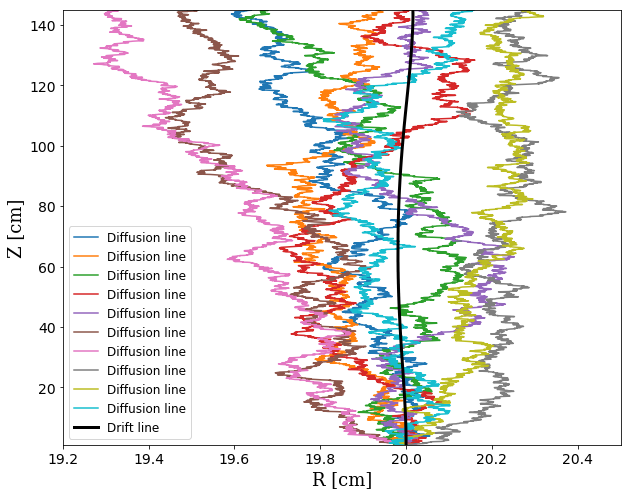

In [87]:
#This should work ... why isn't it?
figure(1)
for i in range(0, len(file_list)):
    r_cm_array, z_cm_array, DriftTime_us_array = Get_drift_line_arrays(file_list[i])
    #print file_list[i]
    #print Diff_z_cm_array[-1]
    
    if file_list[i].startswith('SingleDriftLineCalc'):
        plt.plot(r_cm_array[:pop], z_cm_array[:pop], '-k', linewidth=3, label='Drift line')
    else:
        plt.plot(r_cm_array, z_cm_array, '-', label='Diffusion line')
        
        
plt.xlabel('R [cm]',fontsize=18,family='serif')
plt.ylabel('Z [cm]',fontsize=18,family='serif')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
pylab.legend(loc='best', fontsize=12)

plt.ylim(0.95, 145)
plt.xlim(19.2,20.5)

In [88]:
#Get min length of file
min_length =99999
for f in file_list:
    length = Get_file_length(f)
    if length < min_length:
        min_length = length
        
print min_length

2489


In [100]:
j=10
for f in file_list[:-1]:
    print f
    r,z,t= Get_i_line_from_file(f,j)
    print "("+str(r)+", "+str(z)+", "+str(t)+")"

SingleDiffusionLineMC_TimeStep_.32us_r20cm_z0.5cm_0504_1.txt
(20.0099, 0.906293, 2.24)
SingleDiffusionLineMC_TimeStep_.32us_r20cm_z0.5cm_0504_2.txt
(19.9967, 0.897846, 2.24)
SingleDiffusionLineMC_TimeStep_.32us_r20cm_z0.5cm_0504_3.txt
(19.9798, 0.904644, 2.24)
SingleDiffusionLineMC_TimeStep_.32us_r20cm_z0.5cm_0504_4.txt
(20.0044, 0.910798, 2.24)
SingleDiffusionLineMC_TimeStep_.32us_r20cm_z0.5cm_0504_5.txt
(19.997, 0.909976, 2.24)
SingleDiffusionLineMC_TimeStep_.32us_r20cm_z0.5cm_0504_6.txt
(19.9969, 0.911245, 2.24)
SingleDiffusionLineMC_TimeStep_.32us_r20cm_z0.5cm_0504_7.txt
(20.025, 0.894223, 2.24)
SingleDiffusionLineMC_TimeStep_.32us_r20cm_z0.5cm_0504_8.txt
(19.9961, 0.918554, 2.24)
SingleDiffusionLineMC_TimeStep_.32us_r20cm_z0.5cm_0504_9.txt
(19.9916, 0.920679, 2.24)
SingleDiffusionLineMC_TimeStep_.32us_r20cm_z0.5cm_0504.txt
(19.9862, 0.915883, 2.24)


In [106]:
#Try averaging together 10 diffusion lines
mean_r_list = []
mean_z_list = []
mean_t_list = []

for i in range(1, min_length-4):
    r_list = []
    z_list = []
    t_list = []
    j=-1*i
    #print j
    for f in file_list[:-1]:
        r,z,t= Get_i_line_from_file(f,j)
        r_list.append(r)
        z_list.append(z)
        t_list.append(t)
        #print "("+str(r)+", "+str(z)+", "+str(t)+")"
    #print "("+str(np.mean(r_list))+", "+str(np.mean(z_list))+", "+str(np.mean(t_list))+")"
    #print "\n"
    mean_r_list.append(np.mean(r_list))
    mean_z_list.append(np.mean(z_list))
    mean_t_list.append(np.mean(t_list))

print "len(mean_r_list) = "+str(len(mean_r_list))
print "len(mean_z_list) = "+str(len(mean_z_list))
print "len(mean_t_list) = "+str(len(mean_t_list))

print"\n"
for i in range(0, 5):
    print str(mean_r_list[i])+"\t"+str(mean_z_list[i])+"\t"

print "\n\t..Done!"


len(mean_r_list) = 2484
len(mean_z_list) = 2484
len(mean_t_list) = 2484


19.86371	146.09999999999997	
19.863300000000002	146.0587	
19.862720000000003	145.99550000000002	
19.857850000000003	145.9311	
19.86009	145.8664	

	..Done!


(19, 21)

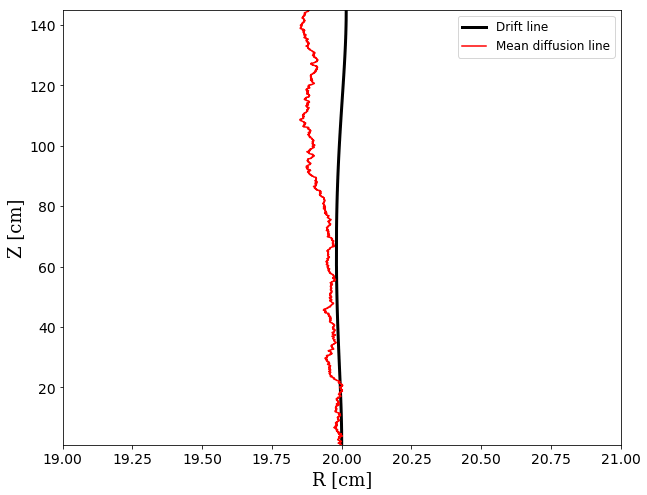

In [108]:

filename="SingleDriftLineCalc_.05cm_r20cm_z0.5cm_0504.txt"
r_cm_array, z_cm_array, DriftTime_us_array = Get_drift_line_arrays(filename)

figure(1)
plt.plot(r_cm_array[:pop], z_cm_array[:pop], '-k', linewidth=3, label='Drift line')
plt.plot(mean_r_list, mean_z_list, '-r', label='Mean diffusion line')

plt.xlabel('R [cm]',fontsize=18,family='serif')
plt.ylabel('Z [cm]',fontsize=18,family='serif')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
pylab.legend(loc='best', fontsize=12)

plt.ylim(0.95, 145)
plt.xlim(19,2)

[19.4825, 20.0248, 19.732, 20.0124, 20.0136, 19.4911, 19.3603, 20.2791, 20.2507, 19.9906]


(array([1., 2., 1., 1., 0., 2., 0., 2., 0., 1.]),
 array([795.083 , 795.3501, 795.6172, 795.8843, 796.1514, 796.4185,
        796.6856, 796.9527, 797.2198, 797.4869, 797.754 ]),
 <a list of 10 Patch objects>)

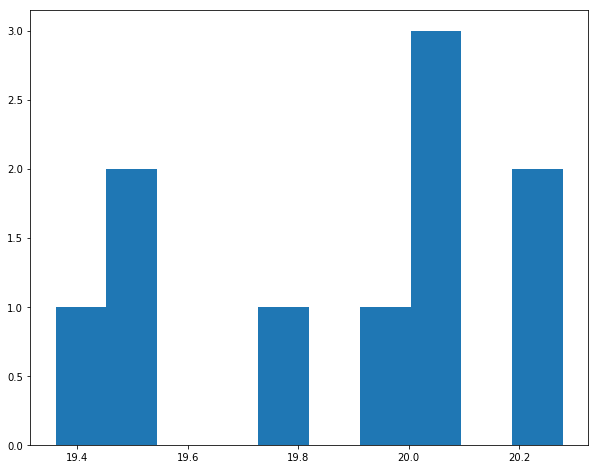

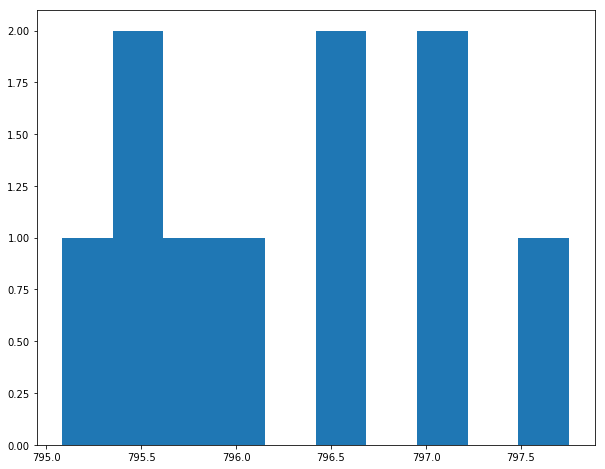

In [117]:
#Get last r entry from each drift line

r_list = []
z_list = []
t_list = []
j=-1
#print j
for f in file_list[:-1]:
    r,z,t= Get_i_line_from_file(f,j)
    r_list.append(r)
    z_list.append(z)
    t_list.append(t)
    
print r_list

figure(1)
plt.hist(r_list)

figure(3)
plt.hist(t_list)

[19.4825, 20.0248, 19.732, 20.0124, 20.0136, 19.4911, 19.3603, 20.2791, 20.2507, 19.9906]


(array([1., 2., 0., 0., 1., 0., 1., 3., 0., 2.]),
 array([19.3603 , 19.45218, 19.54406, 19.63594, 19.72782, 19.8197 ,
        19.91158, 20.00346, 20.09534, 20.18722, 20.2791 ]),
 <a list of 10 Patch objects>)

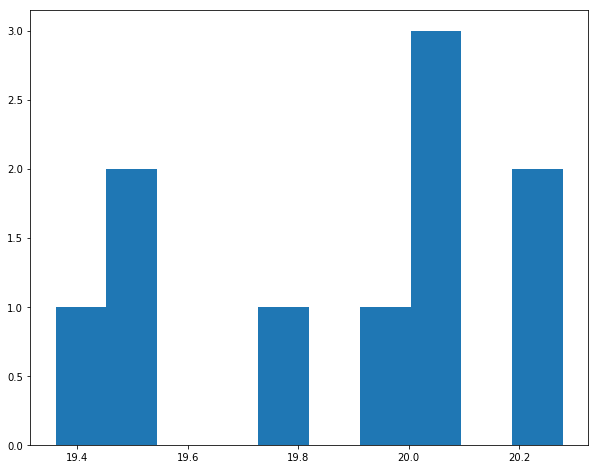